In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data = pd.read_csv('/content/drive/MyDrive/cardiovascular_mapa.csv')

In [8]:
X = data[['age', 'ap_hi', 'ap_lo', 'smoke', 'cholesterol', 'bmi']]
Y = data['cardio']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [10]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

In [13]:
k = 5
cv_scores = cross_val_score(clf, X, Y, cv=k)

In [14]:
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.2f}".format(cv_scores.mean()))

Cross-validation scores: [0.72780588 0.73469687 0.7288322  0.73029837 0.72604648]
Mean accuracy: 0.73


In [16]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

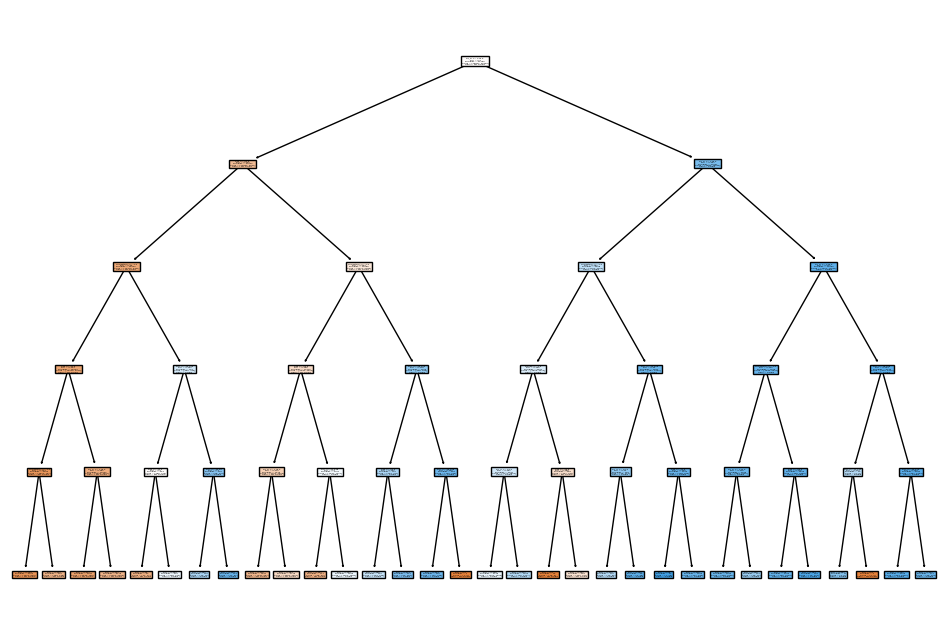

In [17]:
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Cardio', 'Cardio'], max_depth=5)
plt.show()

In [18]:
Y_pred = clf.predict(X_test)

In [19]:
accuracy = accuracy_score(Y_test, Y_pred)

In [20]:
print("Accuracy:", accuracy)

Accuracy: 0.7268355618109312
